### Cell 1: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load Vectorized Matrices from Pickle Files

In [6]:
import pickle

# Load the BoW vectorized matrices
with open('X_train_bow.pkl', 'rb') as f:
    X_train_bow = pickle.load(f)
with open('X_cv_bow.pkl', 'rb') as f:
    X_cv_bow = pickle.load(f)
with open('X_test_bow.pkl', 'rb') as f:
    X_test_bow = pickle.load(f)

# Load the TF-IDF vectorized matrices
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('X_cv_tfidf.pkl', 'rb') as f:
    X_cv_tfidf = pickle.load(f)
with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

# Load the Word2Vec vectorized matrices
with open('X_train_w2v.pkl', 'rb') as f:
    X_train_w2v = pickle.load(f)
with open('X_cv_w2v.pkl', 'rb') as f:
    X_cv_w2v = pickle.load(f)
with open('X_test_w2v.pkl', 'rb') as f:
    X_test_w2v = pickle.load(f)
    
    
    

# Load the y datasets from local files
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_cv.pkl', 'rb') as f:
    y_cv = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)    
    

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def perform_grid_search_cv_random_forest(X_cv, y_cv, n_splits=3):
    """
    Perform Grid Search Cross-Validation to find the optimal hyperparameters for Random Forest using StratifiedKFold with fewer splits.
    """
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, 
                               cv=stratified_kfold, n_jobs=-1, verbose=3, scoring='accuracy')
    grid_search.fit(X_cv, y_cv)
    best_params = grid_search.best_params_
    cv_scores = grid_search.cv_results_['mean_test_score']
    return best_params, cv_scores

def plot_cv_error(cv_scores, params):
    """
    Plot the Cross-Validation error for different hyperparameter values.
    """
    mse = [1 - x for x in cv_scores]
    plt.figure(figsize=(8, 8))
    plt.plot(range(len(params)), mse, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    for i, (param, score) in enumerate(zip(params, mse)):
        plt.annotate(f'({param}, {score:.3f})', (i, score), textcoords='data')
    plt.title('CV Error vs Hyperparameter Values')
    plt.xlabel('Hyperparameter Index')
    plt.ylabel('CV Error')
    plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_random_forest(X_train, y_train, X_test, y_test, params, vectorizer_type):
    """
    Train and evaluate a Random Forest classifier, and plot the confusion matrix and ROC curve.
    """
    print(f"Training Random Forest model with parameters: {params}")
    random_forest = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'])
    random_forest.fit(X_train, y_train)
    print("Training completed. Evaluating the model...")
    y_pred = random_forest.predict(X_test)
    y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    class_labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    sns.heatmap(df_cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {vectorizer_type}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_table = tabulate(report_df, headers='keys', tablefmt='pretty')

    print("Classification Report:")
    print(report_table)

    # Print Accuracy Percentage
    accuracy_percentage = accuracy * 100
    print(f"Accuracy: {accuracy_percentage:.2f}%")
    print(f"ROC AUC Score: {roc_auc:.2f}")

    return accuracy, report, roc_auc

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimal Parameters for Random Forest (CV) with BoW are: {'max_depth': None, 'n_estimators': 50}


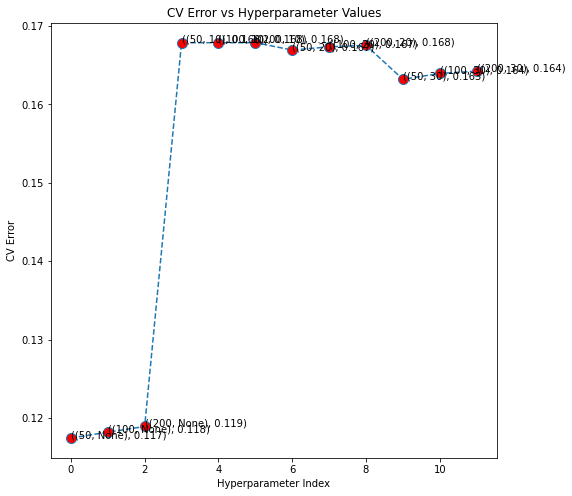

In [9]:
# Perform Grid Search CV for BoW using Random Forest on CV data with fewer splits
best_params_cv_bow, cv_scores_cv_bow = perform_grid_search_cv_random_forest(X_cv_bow, y_cv, n_splits=5)
print('Optimal Parameters for Random Forest (CV) with BoW are:', best_params_cv_bow)

# Define the hyperparameter values used in the grid search
params = [(50, None), (100, None), (200, None), (50, 10), (100, 10), (200, 10), (50, 20), (100, 20), (200, 20), (50, 30), (100, 30), (200, 30)]
plot_cv_error(cv_scores_cv_bow, params)

Training and evaluating Random Forest model for BoW on Test Data...
Training Random Forest model with parameters: {'max_depth': None, 'n_estimators': 50}
Training completed. Evaluating the model...


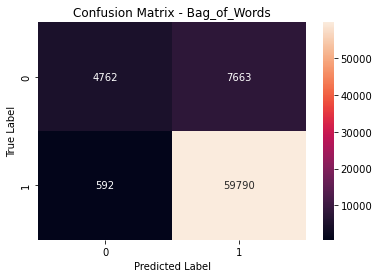

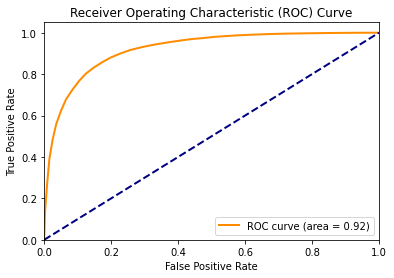

Classification Report:
+--------------+--------------------+---------------------+--------------------+--------------------+
|              |     precision      |       recall        |      f1-score      |      support       |
+--------------+--------------------+---------------------+--------------------+--------------------+
|      0       | 0.8894284646992903 | 0.38325955734406436 | 0.5356881714382137 |      12425.0       |
|      1       | 0.886394971313359  | 0.9901957537014342  | 0.9354245707357141 |      60382.0       |
|   accuracy   | 0.8866180449682036 | 0.8866180449682036  | 0.8866180449682036 | 0.8866180449682036 |
|  macro avg   | 0.8879117180063246 | 0.6867276555227493  | 0.7355563710869639 |      72807.0       |
| weighted avg | 0.886912657185874  | 0.8866180449682036  | 0.8672068889019421 |      72807.0       |
+--------------+--------------------+---------------------+--------------------+--------------------+
Accuracy: 88.66%
ROC AUC Score: 0.92
Accuracy (Test) with B

In [11]:
# Evaluate Random Forest for BoW on Test Data
print("Training and evaluating Random Forest model for BoW on Test Data...")
accuracy_bow, report_bow, roc_auc_bow = evaluate_random_forest(X_train_bow, y_train, X_test_bow, y_test, best_params_cv_bow, 'Bag_of_Words')
print(f'Accuracy (Test) with BoW: {accuracy_bow}')
print(f'ROC AUC Score (Test) with BoW: {roc_auc_bow}')
print(f'Classification Report (Test) with BoW:\n', report_bow)

## TF-IDF

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimal Parameters for Random Forest (CV) with TF-IDF are: {'max_depth': None, 'n_estimators': 50}


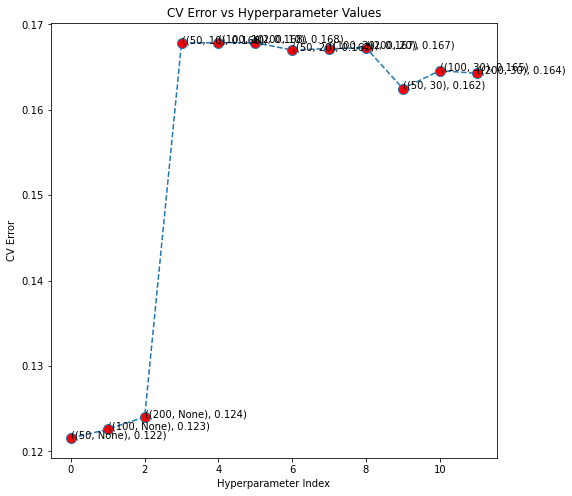

In [12]:
# Perform Grid Search CV for TF-IDF using Random Forest on CV data with fewer splits
best_params_cv_tfidf, cv_scores_cv_tfidf = perform_grid_search_cv_random_forest(X_cv_tfidf, y_cv, n_splits=5)
print('Optimal Parameters for Random Forest (CV) with TF-IDF are:', best_params_cv_tfidf)

# Define the hyperparameter values used in the grid search
params = [(50, None), (100, None), (200, None), (50, 10), (100, 10), (200, 10), (50, 20), (100, 20), (200, 20), (50, 30), (100, 30), (200, 30)]
plot_cv_error(cv_scores_cv_tfidf, params)

Training and evaluating Random Forest model for TF-IDF on Test Data...
Training Random Forest model with parameters: {'max_depth': None, 'n_estimators': 50}
Training completed. Evaluating the model...


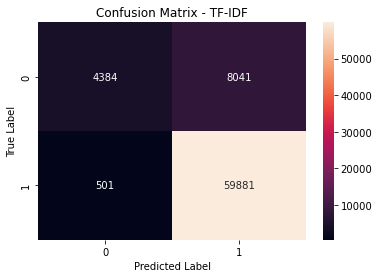

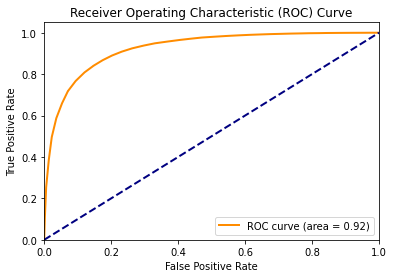

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.8974411463664278 | 0.3528370221327968 | 0.506528018486424  |      12425.0       |
|      1       | 0.8816142045287241 | 0.9917028253453016 | 0.9334237436089288 |      60382.0       |
|   accuracy   | 0.8826761163074979 | 0.8826761163074979 | 0.8826761163074979 | 0.8826761163074979 |
|  macro avg   | 0.8895276754475759 | 0.6722699237390493 | 0.7199758810476764 |      72807.0       |
| weighted avg | 0.8843151776814905 | 0.8826761163074979 | 0.8605711417348353 |      72807.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+
Accuracy: 88.27%
ROC AUC Score: 0.92
Accuracy (Test) with TF-IDF: 0.

In [13]:
# Evaluate Random Forest for TF-IDF on Test Data
print("Training and evaluating Random Forest model for TF-IDF on Test Data...")
accuracy_tfidf, report_tfidf, roc_auc_tfidf = evaluate_random_forest(X_train_tfidf, y_train, X_test_tfidf, y_test, best_params_cv_tfidf, 'TF-IDF')
print(f'Accuracy (Test) with TF-IDF: {accuracy_tfidf}')
print(f'ROC AUC Score (Test) with TF-IDF: {roc_auc_tfidf}')
print(f'Classification Report (Test) with TF-IDF:\n', report_tfidf)

## W2V

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimal Parameters for Random Forest (CV) with Word2Vec are: {'max_depth': None, 'n_estimators': 100}


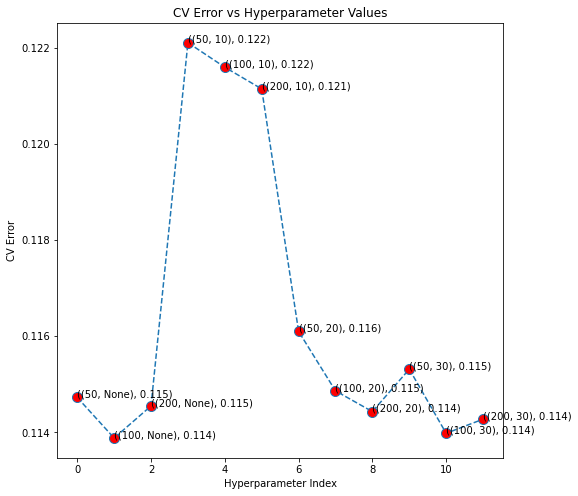

In [14]:
# Perform Grid Search CV for Word2Vec using Random Forest on CV data with fewer splits
best_params_cv_w2v, cv_scores_cv_w2v = perform_grid_search_cv_random_forest(X_cv_w2v, y_cv, n_splits=5)
print('Optimal Parameters for Random Forest (CV) with Word2Vec are:', best_params_cv_w2v)

# Define the hyperparameter values used in the grid search
params = [(50, None), (100, None), (200, None), (50, 10), (100, 10), (200, 10), (50, 20), (100, 20), (200, 20), (50, 30), (100, 30), (200, 30)]
plot_cv_error(cv_scores_cv_w2v, params)

Training and evaluating Random Forest model for W2V on Test Data...
Training Random Forest model with parameters: {'max_depth': None, 'n_estimators': 100}
Training completed. Evaluating the model...


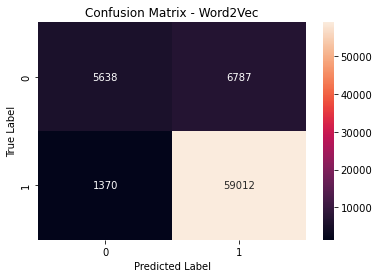

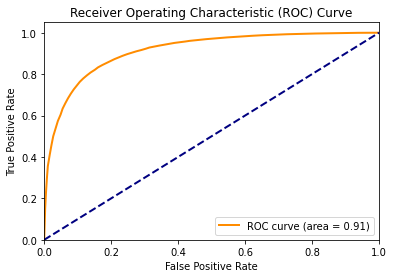

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.8045091324200914 | 0.4537625754527163 | 0.5802500900530027 |      12425.0       |
|      1       | 0.896852535752823  | 0.9773111192077109 | 0.935354768150514  |      60382.0       |
|   accuracy   | 0.8879640693889324 | 0.8879640693889324 | 0.8879640693889324 | 0.8879640693889324 |
|  macro avg   | 0.8506808340864571 | 0.7155368473302136 | 0.7578024291017583 |      72807.0       |
| weighted avg | 0.8810935182626203 | 0.8879640693889324 | 0.8747537871272391 |      72807.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+
Accuracy: 88.80%
ROC AUC Score: 0.91
Accuracy (Test) with W2V: 0.887

In [16]:
# Evaluate Random Forest for W2V on Test Data
print("Training and evaluating Random Forest model for W2V on Test Data...")
accuracy_w2v, report_w2v, roc_auc_w2v = evaluate_random_forest(X_train_w2v, y_train, X_test_w2v, y_test, best_params_cv_w2v, 'Word2Vec')
print(f'Accuracy (Test) with W2V: {accuracy_w2v}')
print(f'ROC AUC Score (Test) with W2V: {roc_auc_w2v}')
print(f'Classification Report (Test) with W2V:\n', report_w2v)

In [17]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the following variables already defined:
# accuracy_bow, report_bow, roc_auc_bow
# accuracy_tfidf, report_tfidf, roc_auc_tfidf
# accuracy_w2v, report_w2v, roc_auc_w2v

# Function to extract relevant metrics from the classification reports
def extract_overall_metrics(report):
    return {
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }

# Extract overall metrics for each vectorization method
metrics_bow = extract_overall_metrics(report_bow)
metrics_tfidf = extract_overall_metrics(report_tfidf)
metrics_w2v = extract_overall_metrics(report_w2v)

# Create a DataFrame to hold the data
data = {
    'Vectorization': ['BoW', 'TF-IDF', 'Word2Vec'],
    'Accuracy': [f"{metrics_bow['Accuracy'] * 100:.2f}%", f"{metrics_tfidf['Accuracy'] * 100:.2f}%", f"{metrics_w2v['Accuracy'] * 100:.2f}%"],
    'Precision': [f"{metrics_bow['Precision']:.2f}", f"{metrics_tfidf['Precision']:.2f}", f"{metrics_w2v['Precision']:.2f}"],
    'Recall': [f"{metrics_bow['Recall']:.2f}", f"{metrics_tfidf['Recall']:.2f}", f"{metrics_w2v['Recall']:.2f}"],
    'F1-Score': [f"{metrics_bow['F1-Score']:.2f}", f"{metrics_tfidf['F1-Score']:.2f}", f"{metrics_w2v['F1-Score']:.2f}"],
    'AUC': [f"{roc_auc_bow:.2f}", f"{roc_auc_tfidf:.2f}", f"{roc_auc_w2v:.2f}"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame as a pretty table without the index column
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+-----------+--------+----------+------+
| Vectorization | Accuracy | Precision | Recall | F1-Score | AUC  |
+---------------+----------+-----------+--------+----------+------+
|      BoW      |  88.66%  |   0.89    |  0.69  |   0.74   | 0.92 |
|    TF-IDF     |  88.27%  |   0.89    |  0.67  |   0.72   | 0.92 |
|   Word2Vec    |  88.80%  |   0.85    |  0.72  |   0.76   | 0.91 |
+---------------+----------+-----------+--------+----------+------+
